In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torch_dct import DCT_CONV
from utilities import *
import torch
from tqdm import tqdm
import os
from scipy.ndimage.filters import gaussian_filter

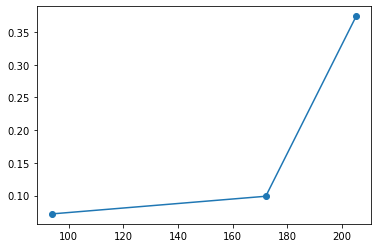

In [2]:

%matplotlib inline

M = DCT_CONV(ksize=8)
M.eval()
# M.show_net()
im = load_tensor_img("forged_images/cyg.png")

Lm,Lv= M.image_variance_hist(im, e_per_bin=100000, f_var=0.005)
plt.plot(Lm,Lv,'o-')

0.20190244298896998

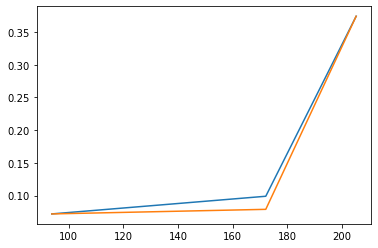

In [3]:
Lm2 = [93.88125, 172.1, 205.29168701171875]
Lv2 = [0.07195627689361572, 0.07895280003547668, 0.37412306666374207]
plt.plot(Lm, Lv)
plt.plot(Lm, Lv2)
curve_score(Lm, Lv, Lm2, Lv2)

In [4]:
Lm,Lv= M.image_variance_hist(im, e_per_bin=100000, f_var=0.005)


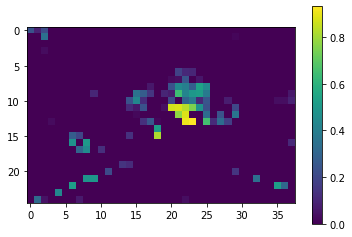

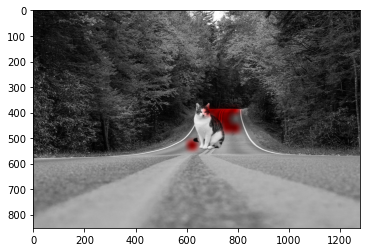

In [5]:
%matplotlib inline
im = load_tensor_img("forged_images/road_cat.png")
Lm,Lv= M.image_variance_hist(im, e_per_bin=100000, f_var=0.005)
# Lv = [e if e<1 else 0 for e in Lv]
# plt.plot(Lm,Lv,'o-')

patch_size= 128
step = patch_size//2
e_per_bin= 10000
f_var = 0.005

patch_size= 64
step = patch_size//2
e_per_bin= 3000
f_var = 0.3


percent_wrong = compute_suspicious_pixels(M, im, patch_size, e_per_bin, f_var)

# plt.plot(Lm2,Lv2,'o-')

plt.imshow(percent_wrong)
plt.colorbar()
plt.show()
plt.imshow(show_heat_map(im,percent_wrong>0.7))
plt.show()

## Alexis dataset

In [78]:
folder='scale3/'
files = os.listdir('CMFDdb_grip/'+folder)
files.sort()
def alexis_image(i):
    return 'CMFDdb_grip/'+folder+files[2*i]
def alexis_mask(i):
    return 'CMFDdb_grip/'+folder+files[2*i+1]

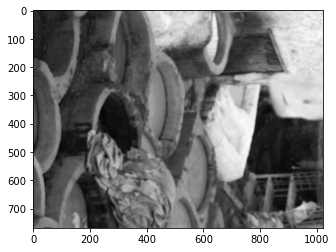

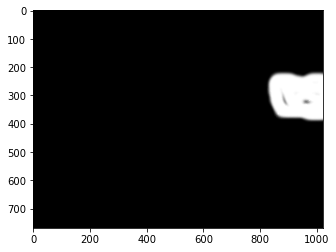

In [79]:
%matplotlib inline
k_im=3
im = load_tensor_img(alexis_image(k_im))
plt.imshow(im, cmap='gray')
plt.show()
mask = np.array(Image.open(alexis_mask(k_im)))
plt.imshow(mask, cmap='gray')
plt.show()


100%|██████████| 22/22 [00:03<00:00,  6.23it/s]


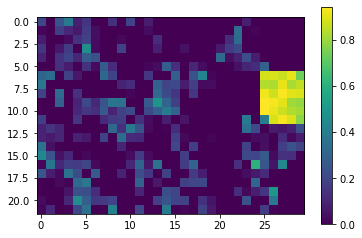

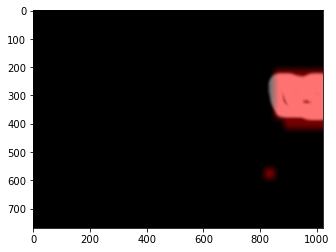

0.1925827265085101

In [80]:

Lm,Lv= M.image_variance_hist(im, e_per_bin=100000, f_var=0.005)

patch_size= 64
e_per_bin= 1500
f_var = 0.3


percent_wrong = compute_suspicious_pixels(M, im, patch_size, e_per_bin, f_var)

# plt.plot(Lm2,Lv2,'o-')

plt.imshow(percent_wrong)
plt.colorbar()
plt.show()
plt.imshow(show_heat_map(mask,percent_wrong>0.6, "MASK"))
plt.show()

Fmeasure(mask, (percent_wrong>0.1))

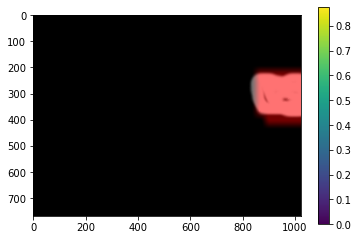

0.8430779997455147

In [81]:
blured=gaussian_filter(percent_wrong, 1)
out_m = (blured>blured.max()*0.5)

plt.imshow(blured*out_m)
plt.colorbar()
plt.imshow(show_heat_map(mask,out_m, "MASK"))
plt.show()
Fmeasure(mask, out_m)



In [82]:

Ls = []
x=[]
for blur_f in np.linspace(0.5,1.5, 5):
    l = []
    x=[]
    for select_fac in np.linspace(0,0.9, 20):
        x.append(select_fac)
        blured=gaussian_filter(percent_wrong, blur_f)
        selected = (blured>blured.max()*select_fac)*1
        l.append(Fmeasure(mask, selected))
    Ls.append((blur_f, l))

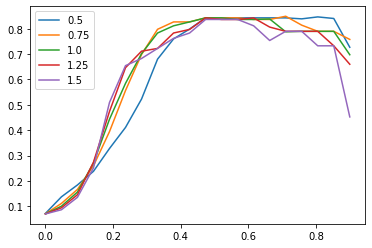

In [83]:
for val, lst in Ls:
    plt.plot(x,lst, label=str(val))
plt.legend()
plt.show()

In [84]:
Fmeasure(mask, (percent_wrong>0.3)*1)

0.4784716642139381

100%|██████████| 22/22 [00:03<00:00,  6.65it/s]


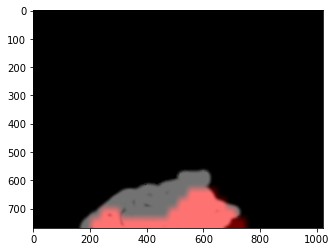

100%|██████████| 22/22 [00:02<00:00,  7.44it/s]


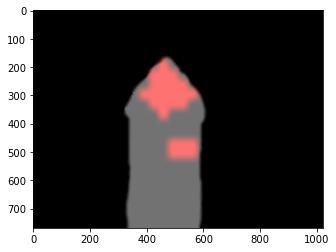

100%|██████████| 22/22 [00:03<00:00,  6.20it/s]


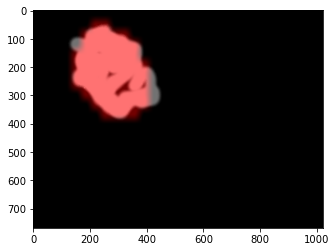

100%|██████████| 22/22 [00:03<00:00,  5.95it/s]


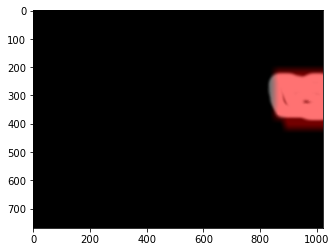

100%|██████████| 22/22 [00:03<00:00,  6.73it/s]


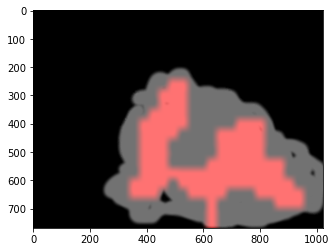

100%|██████████| 22/22 [00:03<00:00,  6.11it/s]


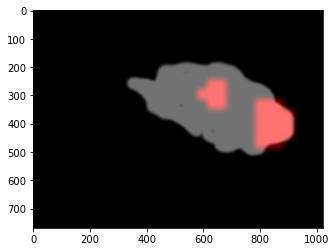

100%|██████████| 22/22 [00:03<00:00,  7.24it/s]


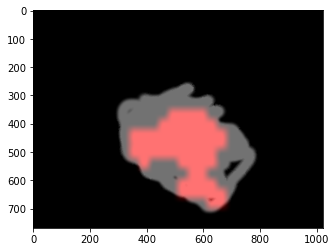

100%|██████████| 22/22 [00:02<00:00,  7.34it/s]


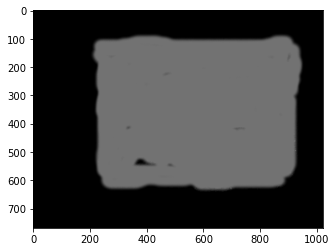

100%|██████████| 22/22 [00:02<00:00,  7.62it/s]


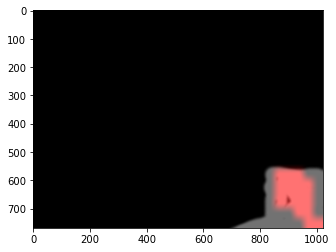

100%|██████████| 22/22 [00:02<00:00,  8.15it/s]


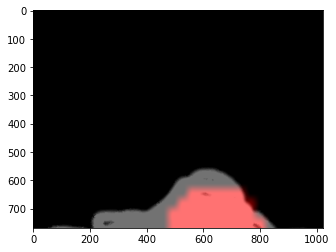

100%|██████████| 22/22 [00:03<00:00,  6.99it/s]


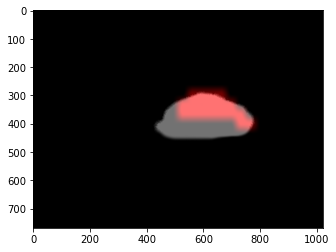

100%|██████████| 22/22 [00:02<00:00,  7.71it/s]


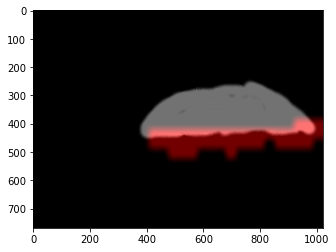

100%|██████████| 22/22 [00:03<00:00,  5.73it/s]


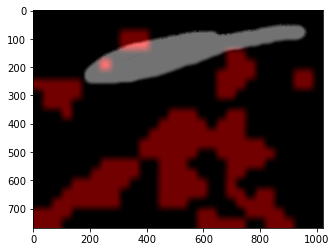

100%|██████████| 30/30 [00:03<00:00,  9.75it/s]


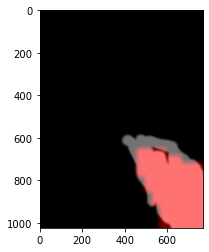

100%|██████████| 22/22 [00:02<00:00,  7.61it/s]


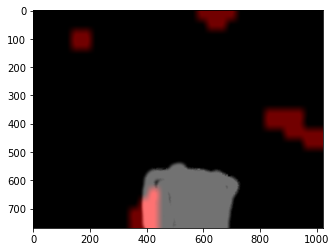

100%|██████████| 30/30 [00:03<00:00,  9.76it/s]


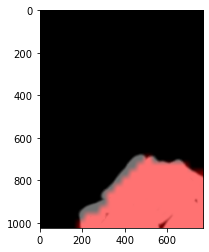

100%|██████████| 22/22 [00:03<00:00,  6.51it/s]


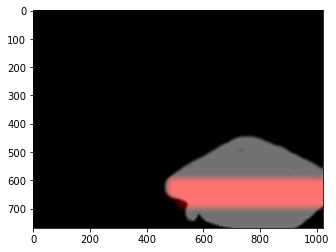

100%|██████████| 22/22 [00:03<00:00,  6.96it/s]


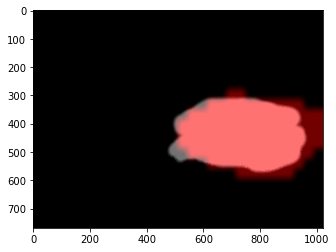

100%|██████████| 30/30 [00:03<00:00,  9.33it/s]


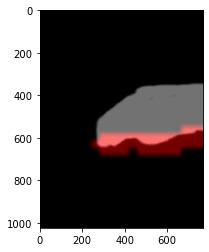

100%|██████████| 22/22 [00:04<00:00,  5.36it/s]


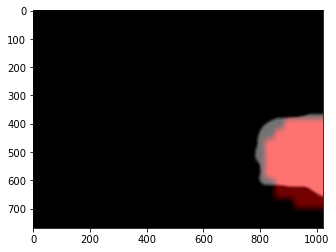

100%|██████████| 22/22 [00:02<00:00,  7.75it/s]


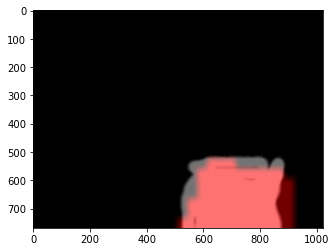

100%|██████████| 22/22 [00:02<00:00,  8.43it/s]


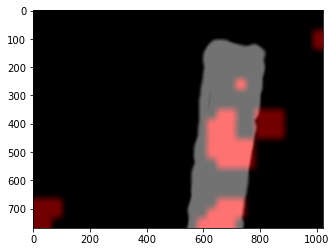

100%|██████████| 30/30 [00:04<00:00,  7.32it/s]


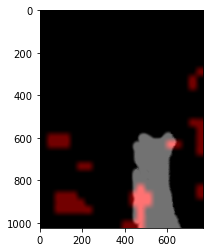

100%|██████████| 30/30 [00:02<00:00, 10.43it/s]


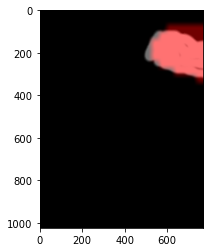

100%|██████████| 22/22 [00:03<00:00,  7.09it/s]


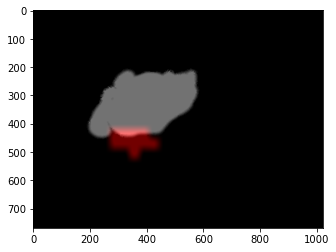

100%|██████████| 30/30 [00:02<00:00, 11.50it/s]


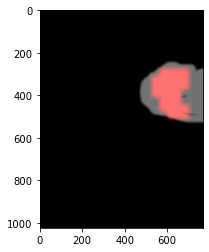

100%|██████████| 22/22 [00:02<00:00,  7.39it/s]


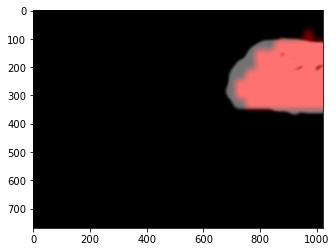

100%|██████████| 22/22 [00:03<00:00,  6.65it/s]


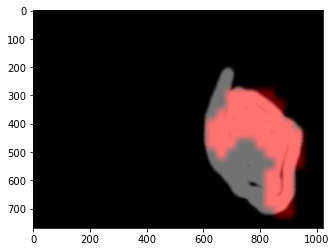

100%|██████████| 22/22 [00:04<00:00,  5.49it/s]


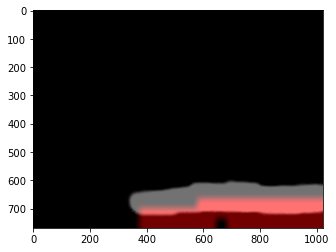

100%|██████████| 30/30 [00:02<00:00, 10.36it/s]


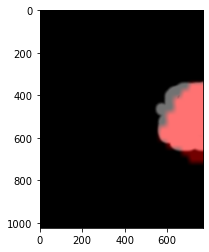

100%|██████████| 22/22 [00:02<00:00,  8.48it/s]


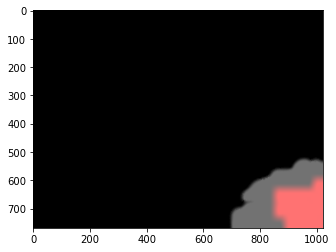

100%|██████████| 30/30 [00:02<00:00, 12.41it/s]


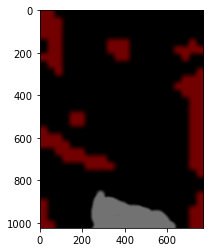

100%|██████████| 30/30 [00:02<00:00, 10.41it/s]


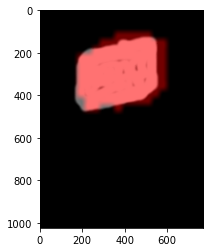

100%|██████████| 30/30 [00:02<00:00, 10.51it/s]


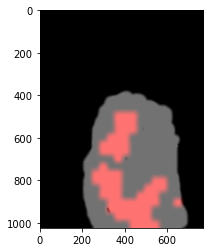

100%|██████████| 22/22 [00:02<00:00,  8.09it/s]


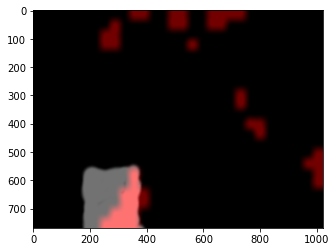

100%|██████████| 22/22 [00:03<00:00,  7.11it/s]


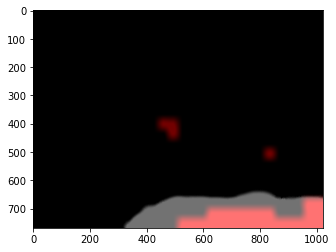

100%|██████████| 22/22 [00:04<00:00,  4.71it/s]


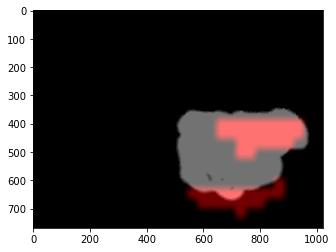

100%|██████████| 22/22 [00:04<00:00,  5.03it/s]


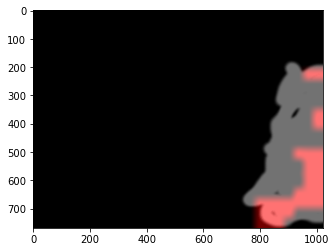

100%|██████████| 22/22 [00:03<00:00,  6.85it/s]


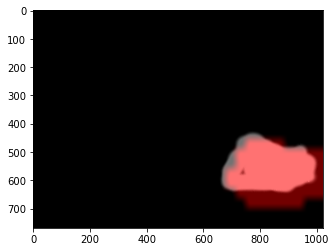

100%|██████████| 30/30 [00:02<00:00, 10.99it/s]


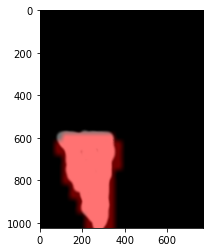

100%|██████████| 22/22 [00:02<00:00,  7.46it/s]


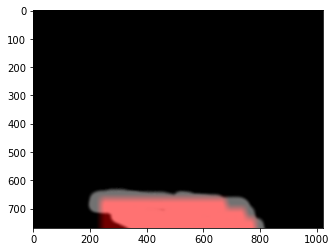

100%|██████████| 22/22 [00:02<00:00,  7.53it/s]


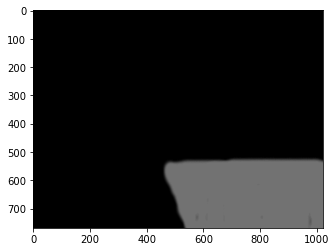

100%|██████████| 22/22 [00:05<00:00,  4.12it/s]


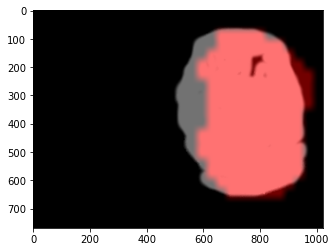

100%|██████████| 22/22 [00:03<00:00,  7.07it/s]


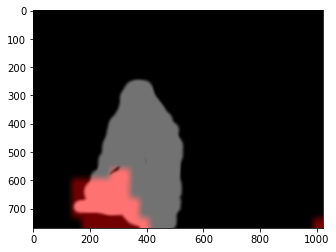

100%|██████████| 22/22 [00:03<00:00,  6.77it/s]


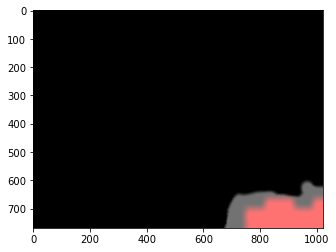

100%|██████████| 22/22 [00:04<00:00,  4.93it/s]


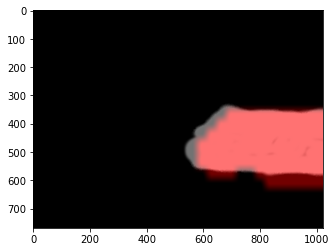

100%|██████████| 22/22 [00:04<00:00,  5.01it/s]


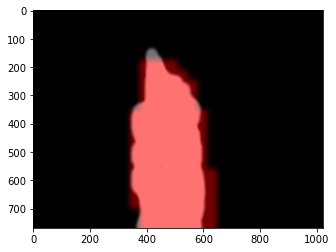

100%|██████████| 22/22 [00:04<00:00,  4.60it/s]


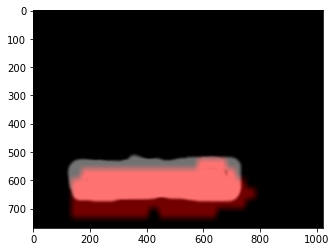

100%|██████████| 22/22 [00:05<00:00,  3.80it/s]


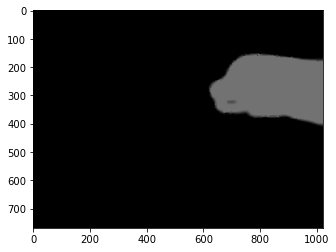

100%|██████████| 22/22 [00:03<00:00,  6.14it/s]


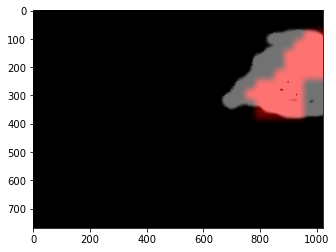

100%|██████████| 22/22 [00:02<00:00,  7.36it/s]


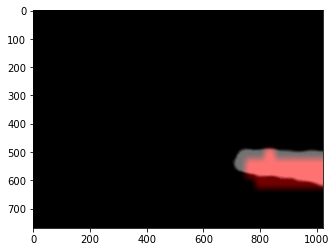

100%|██████████| 22/22 [00:05<00:00,  4.01it/s]


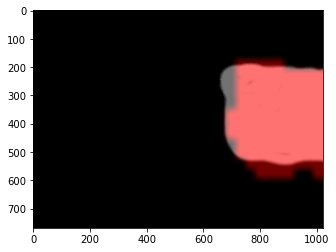

100%|██████████| 22/22 [00:04<00:00,  5.35it/s]


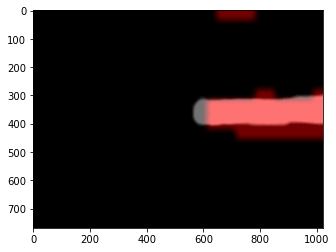

100%|██████████| 22/22 [00:03<00:00,  5.65it/s]


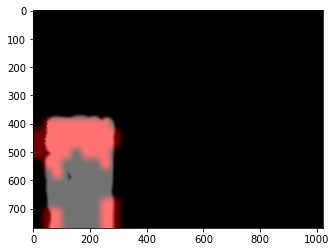

100%|██████████| 22/22 [00:03<00:00,  7.09it/s]


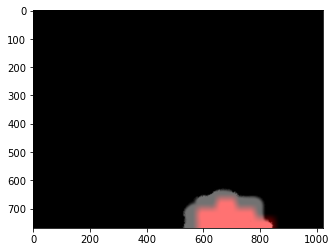

100%|██████████| 22/22 [00:04<00:00,  4.82it/s]


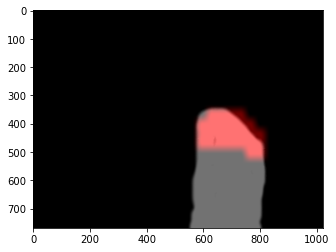

100%|██████████| 22/22 [00:03<00:00,  6.23it/s]


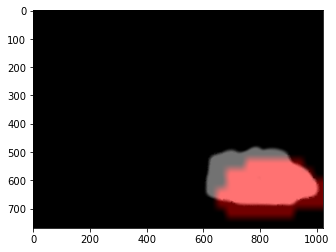

100%|██████████| 22/22 [00:04<00:00,  5.32it/s]


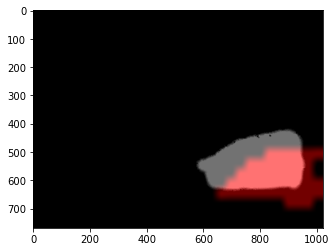

100%|██████████| 22/22 [00:02<00:00,  7.36it/s]


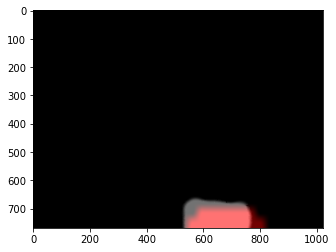

100%|██████████| 22/22 [00:03<00:00,  6.13it/s]


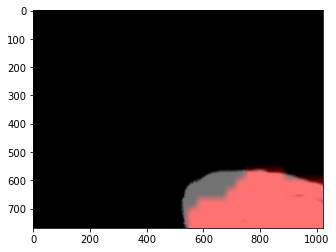

100%|██████████| 22/22 [00:02<00:00,  7.40it/s]


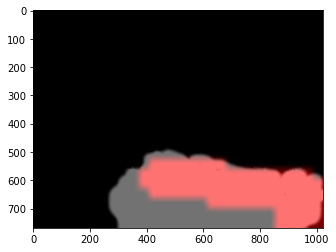

100%|██████████| 22/22 [00:03<00:00,  6.60it/s]


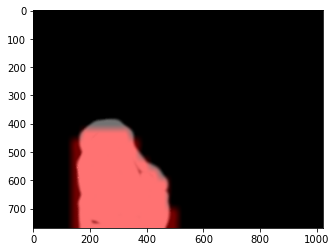

100%|██████████| 22/22 [00:04<00:00,  4.61it/s]


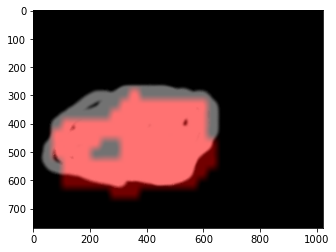

100%|██████████| 22/22 [00:04<00:00,  5.13it/s]


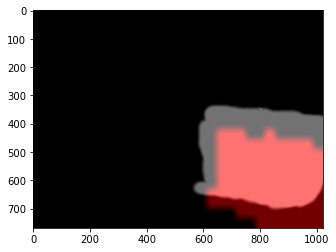

100%|██████████| 22/22 [00:03<00:00,  6.34it/s]


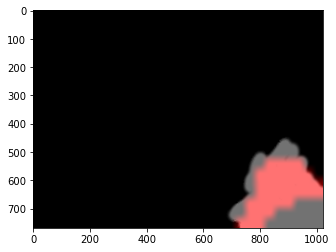

100%|██████████| 22/22 [00:03<00:00,  6.48it/s]


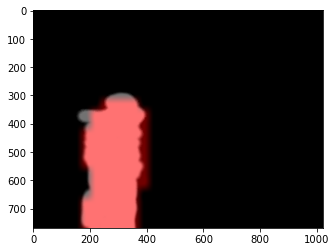

100%|██████████| 22/22 [00:03<00:00,  6.85it/s]


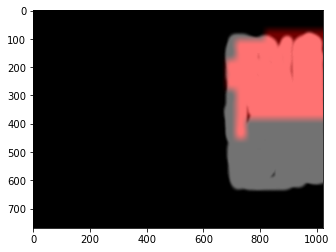

100%|██████████| 22/22 [00:03<00:00,  7.11it/s]


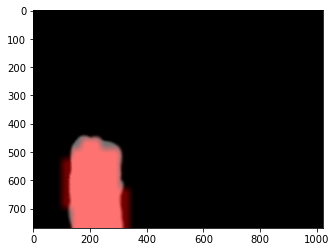

100%|██████████| 22/22 [00:03<00:00,  5.57it/s]


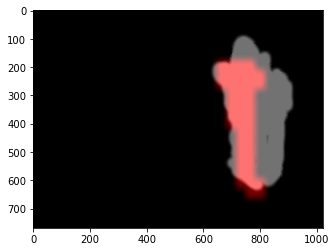

100%|██████████| 22/22 [00:04<00:00,  5.21it/s]


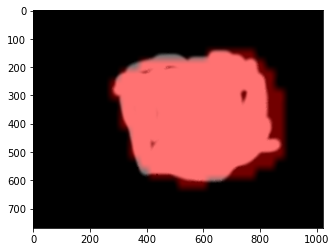

100%|██████████| 22/22 [00:02<00:00,  7.86it/s]


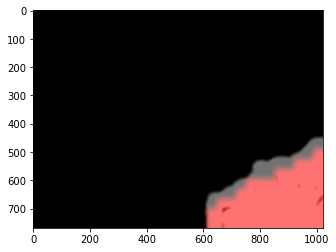

100%|██████████| 22/22 [00:03<00:00,  5.96it/s]


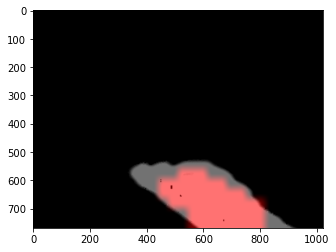

100%|██████████| 22/22 [00:02<00:00,  7.48it/s]


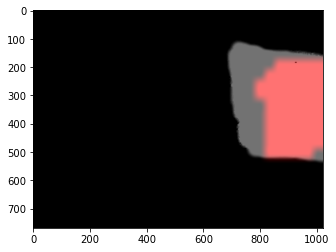

100%|██████████| 22/22 [00:02<00:00,  8.34it/s]


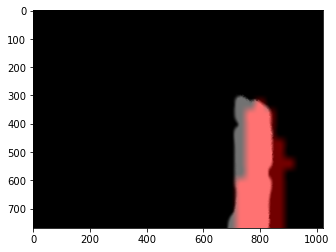

100%|██████████| 22/22 [00:02<00:00,  8.23it/s]


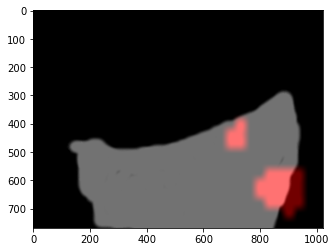

100%|██████████| 22/22 [00:04<00:00,  4.82it/s]


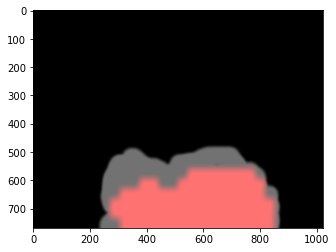

100%|██████████| 22/22 [00:03<00:00,  6.31it/s]


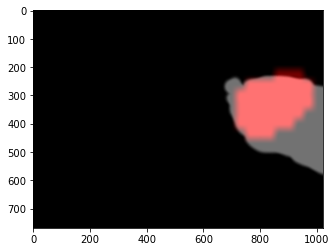

100%|██████████| 22/22 [00:02<00:00,  8.55it/s]


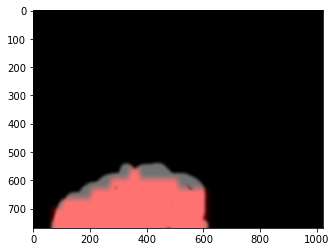

100%|██████████| 22/22 [00:02<00:00,  8.31it/s]


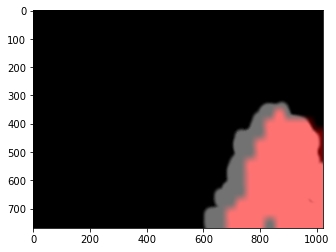

100%|██████████| 22/22 [00:02<00:00,  7.87it/s]


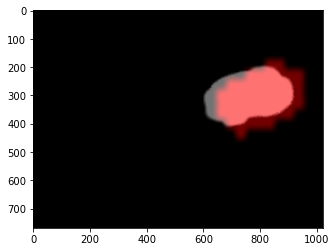

100%|██████████| 80/80 [07:02<00:00,  5.29s/it]


0.6253849503302463

In [86]:

fms=[]
for k_im in tqdm(range(len(files)//2)):
    im = load_tensor_img(alexis_image(k_im))
    mask = np.array(Image.open(alexis_mask(k_im)))
    Lm,Lv= M.image_variance_hist(im, e_per_bin=100000, f_var=0.005)
    patch_size= 64
    e_per_bin= 1500
    f_var = 0.3
    percent_wrong = compute_suspicious_pixels(M, im, patch_size, e_per_bin, f_var)

    # Gaussian filtering
    blured = gaussian_filter(percent_wrong, 1)
    if blured.max()>0.1:
        out_m = blured>blured.max()*0.5
    else:
        out_m = np.zeros_like(blured)

    fms.append(Fmeasure(mask,out_m)) 
    plt.clf()
    plt.imshow(show_heat_map(mask,out_m, "MASK"))
    plt.show()
sum(fms)/len(fms)

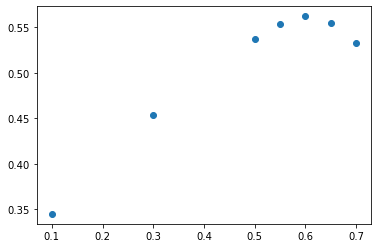

In [36]:

# tresh on percent_wrong, 1000 e_per_bin
L=[(0.1, 0.34515), (0.3, 0.45342), (0.5, 0.5375), (0.55, 0.553746134656792), (0.6, 0.562143304),  (0.65, 0.5546), (0.7, 0.533)]
plt.plot([e[0] for e in L],[e[1] for e in L],'o-')



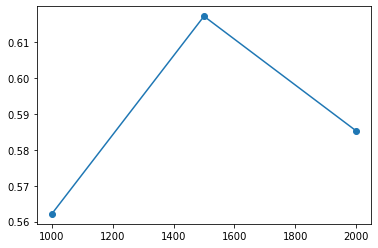

In [74]:
# e_per_bin, tresh 0.6

L=[(1000, 0.562143304),(1500, 0.61720), (2000, 0.5852749080648446)]
plt.plot([e[0] for e in L],[e[1] for e in L],'o-')

AttributeError: 'Line2D' object has no property 'ylims'

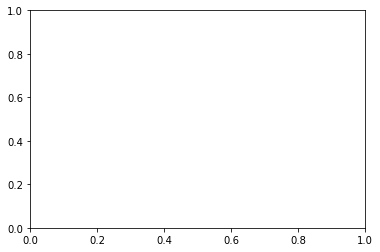

In [91]:
scales = [2, 2.5, 3]
fm = [0.61720, 0.6258807211509178]
fmb=[0.74, 0.71, 0.625]

plt.plot(scales, fmb, )

100%|██████████| 37/37 [00:05<00:00,  7.16it/s]


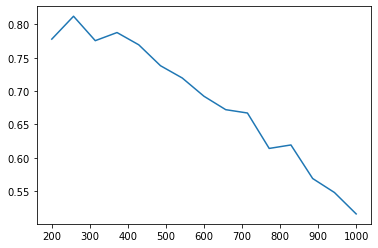

In [54]:
k_im=5
fm2s=[]

VALS =np.linspace(200,1000, 15)
for e_per_bin in VALS:
    im = load_tensor_img(alexis_image(k_im))
    mask = np.array(Image.open(alexis_mask(k_im)))
    Lm,Lv= M.image_variance_hist(im, e_per_bin=100000, f_var=0.005)
    patch_size= 40
    step = patch_size//2
    e_per_bin= int(e_per_bin)
    f_var = 0.3
    percent_wrong = compute_suspicious_pixels(M, im, patch_size, e_per_bin, f_var)
    fm2s.append(Fmeasure(mask, (percent_wrong>0.6)*1)) 
plt.plot(VALS, fm2s)

## Test

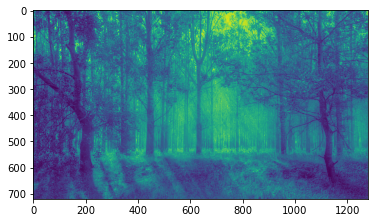

In [ ]:
# im=load_tensor_img("forged_images/forest_rhino.jpg")
im=load_tensor_img("paysages/forest.jpg")


out = M(im)
plt.imshow(im)
arr = (out[36:]**2).mean(dim=0).detach()



0


/var/folders/b0/vdqv_k0s1w73jvkrsk0kfb7c0000gn/T/ipykernel_6104/1089597685.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  values = torch.masked_select(torch.tensor(arr), torch.tensor(mask))


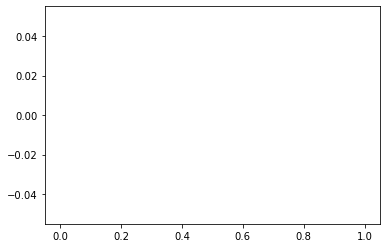

10


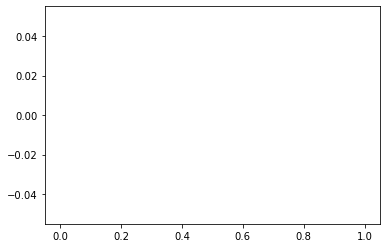

20


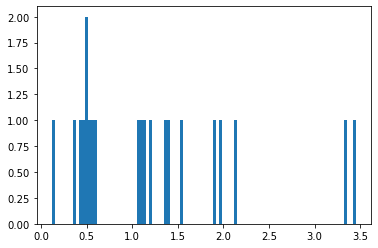

30


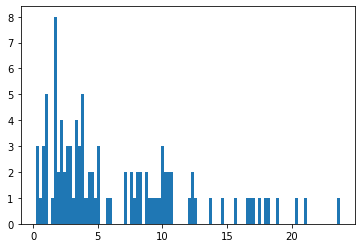

40


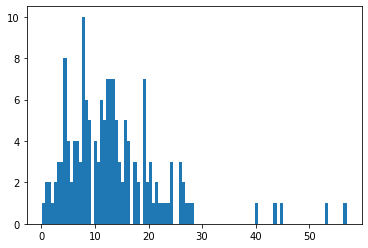

50


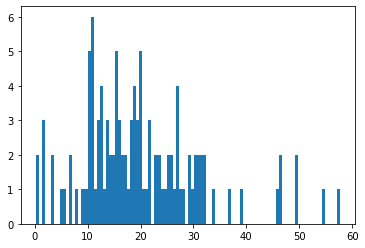

60


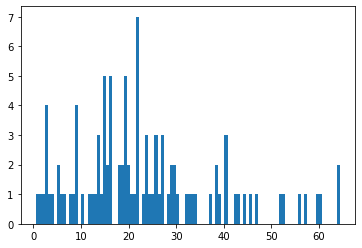

70


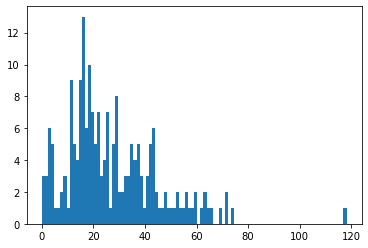

80


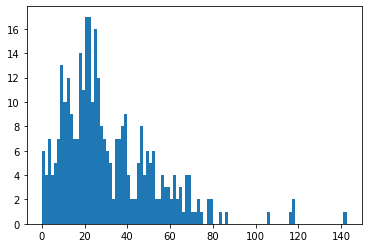

90


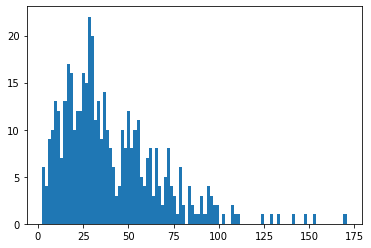

100


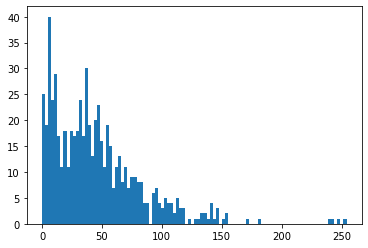

110


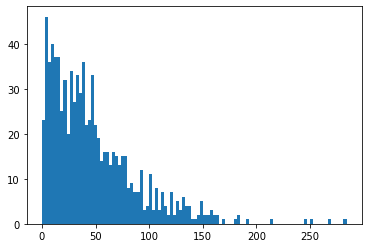

120


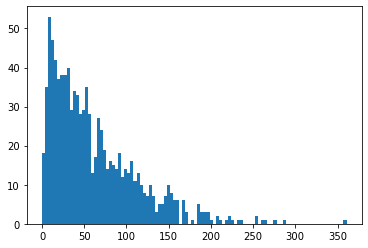

130


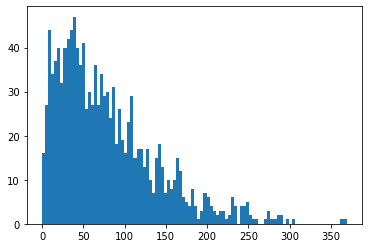

140


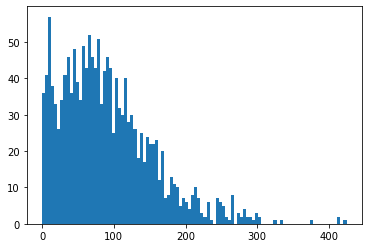

150


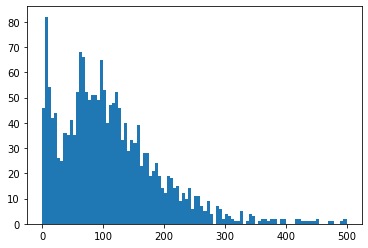

160


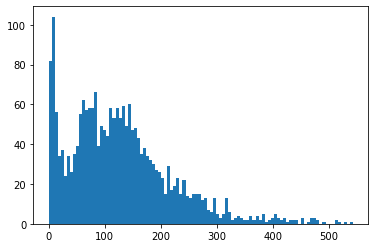

170


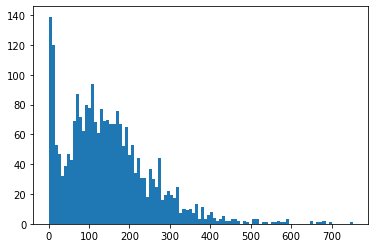

180


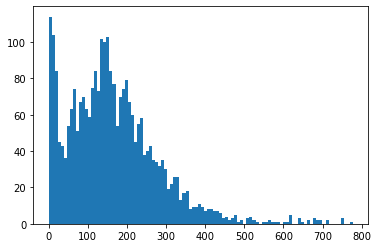

190


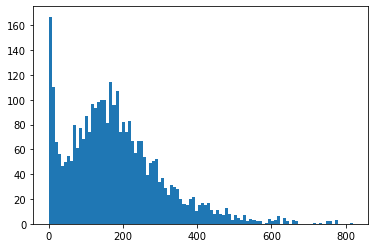

200


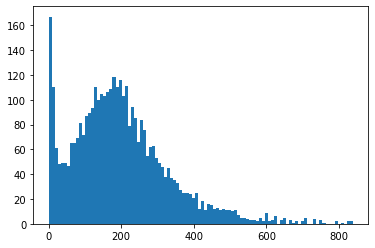

210


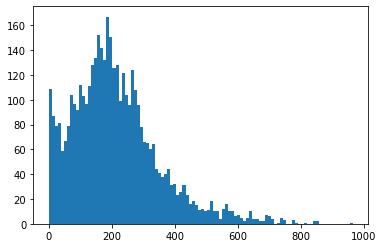

220


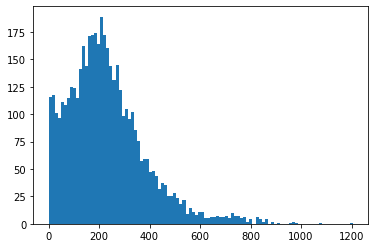

230


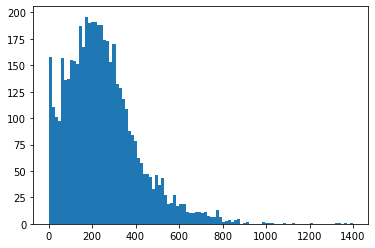

240


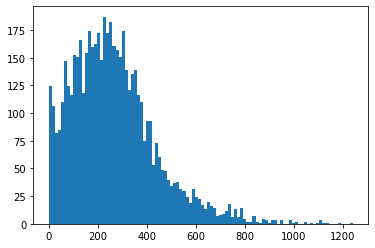

250


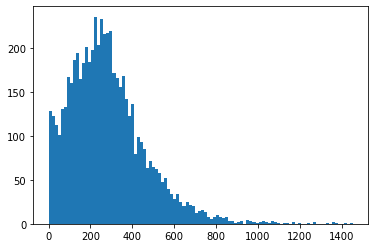

In [122]:

%matplotlib inline
arr = (out[36:]**2).mean(dim=0).detach()

step=10

means=[]

for i in range(0,255,step):
    mask = (out[0]>i)*(out[0]<i+step)
    print(i)
    values = torch.masked_select(torch.tensor(arr), torch.tensor(mask))
    means.append(values.mean())
    plt.hist(values.tolist(),bins=100)
    plt.show()

values = range(0,255,step)


/var/folders/b0/vdqv_k0s1w73jvkrsk0kfb7c0000gn/T/ipykernel_6104/565562954.py:2: RuntimeWarning: invalid value encountered in log
  plt.plot(values,np.log(means)/np.sqrt(values))


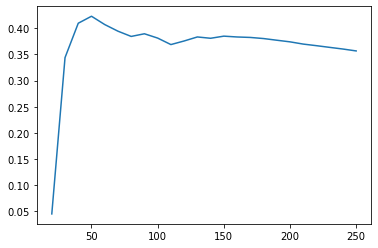

In [127]:
values=np.array(values)
plt.plot(values,np.log(means)/np.sqrt(values))


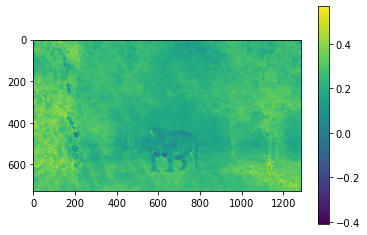

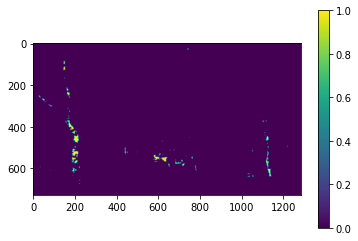

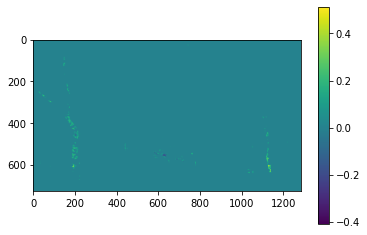

In [128]:
im = load_tensor_img("forged_images/forest_rhino.jpg")
out = M(im)
lowf = M.lowfreq_var(out)
arr = (out[36:]**2).mean(dim=0)
# arr = reduce_array(arr,4,np.mean)
# arr = reduce_array(arr,4,np.mean)

normalization = (torch.log(arr)/torch.sqrt(out[0])).detach()
# normalization = reduce_array(normalization,4,np.mean)
# normalization = reduce_array(normalization,4,np.mean)
plt.imshow(normalization)
plt.colorbar()
plt.show()
plt.imshow(-torch.log(lowf).detach()>-4)
plt.colorbar()
plt.show()
plt.imshow(normalization*(-torch.log(lowf).detach()>-4))
plt.colorbar()
plt.show()



## Test2

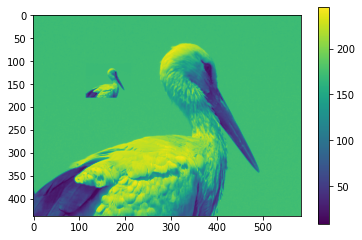

In [9]:
plt.imshow(im.detach().numpy())
plt.colorbar()

0


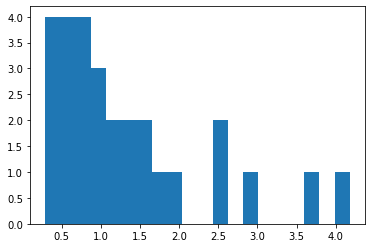

40


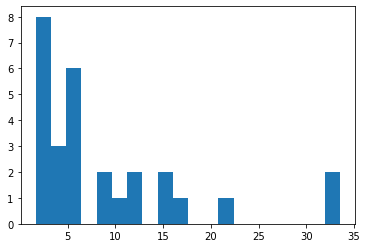

80


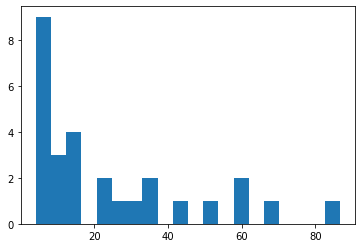

120


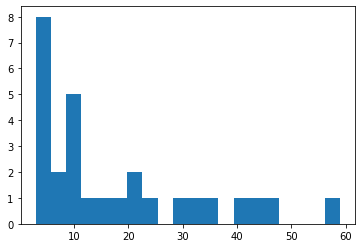

160


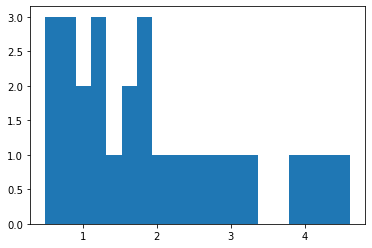

200


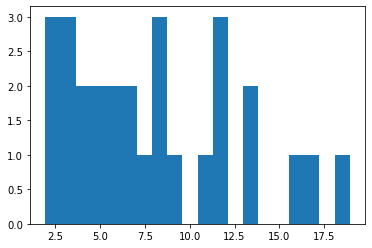

240


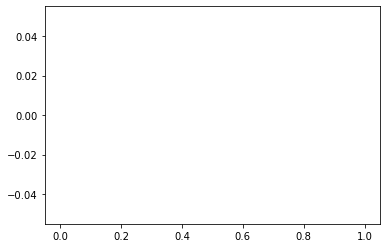

In [14]:
%matplotlib inline
im = load_tensor_img("forged_images/cyg.png")



output = M(im)
mean_dct = M.mean_dct(output)
lowfreq_var = M.lowfreq_var(output)
step=40
for i in range(0, 255, step):
    print(i)
    out = M.noise_var(output, mean_dct, lowfreq_var, i, i+step,1, median=False).detach().numpy()
    # plt.plot(np.zeros_like(out), out, 'o')
    plt.hist(out.tolist(),bins=20)
    plt.show()

## Ellipse fit


/var/folders/b0/vdqv_k0s1w73jvkrsk0kfb7c0000gn/T/ipykernel_89412/2080568156.py:17: RuntimeWarning: divide by zero encountered in true_divide
  penalize = np.exp(-dist_from_center**2/r**2)
/var/folders/b0/vdqv_k0s1w73jvkrsk0kfb7c0000gn/T/ipykernel_89412/2080568156.py:17: RuntimeWarning: invalid value encountered in true_divide
  penalize = np.exp(-dist_from_center**2/r**2)


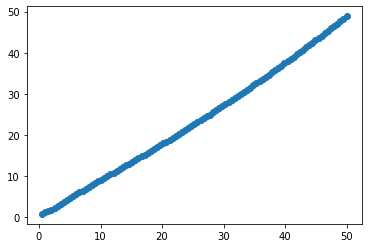

      fun: -0.628862837893029
 hess_inv: array([[ 0.4831008 , -0.08489203, -0.50598562],
       [-0.08489203,  0.55453421,  0.20218214],
       [-0.50598562,  0.20218214,  2.00710549]])
      jac: array([-8.52346420e-06, -8.73208046e-06, -1.19209290e-06])
  message: 'Optimization terminated successfully.'
     nfev: 76
      nit: 13
     njev: 19
   status: 0
  success: True
        x: array([10.17987073, 22.96874893,  2.06821791])


In [482]:
from scipy.optimize import minimize

def filtered_argmax(im, tresh=0.7, redfac=4):
    red = reduce_array((im>tresh)*im, redfac, np.mean)
    x,y = np.unravel_index(red.argmax(), red.shape)
    return redfac*x, redfac*y

def create_circular_mask(h, w, center=None, radius=None):
    X,Y= np.ogrid[:h, :w]
    dist_from_center = (X - center[0])**2 + (Y- center[1])**2
    return (dist_from_center <= radius**2)

def circle_score(x, y, r, im):
    h,w = im.shape
    X,Y = np.ogrid[:h, :w]
    dist_from_center = (X - x)**2 + (Y-y)**2
    penalize = np.exp(-dist_from_center**2/r**2)
    mask = im*penalize
    return -np.sum(mask)+ 1.5*r


target_func = lambda x: circle_score(x[0],x[1],x[2],percent_wrong)

L = np.linspace(0,50,100)
plt.plot(L, [target_func((12,20,r)) for r in L], 'o')
plt.show()
filtered_argmax(percent_wrong)
res = minimize(target_func, (12,20,10))
print(res)

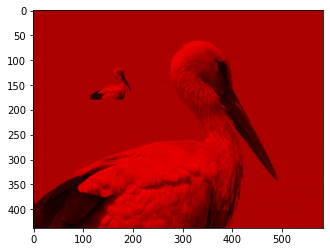

In [433]:
x,y,r =res.x
h,w = percent_wrong.shape
mask = create_circular_mask(h,w,(x,y),r)

plt.imshow(show_heat_map(im,mask))
plt.show()

In [437]:
def filtered_argmax(im, tresh=0.7, redfac=4):
    red = reduce_array((im>tresh)*im, redfac, np.mean)
    x,y = np.unravel_index(red.argmax(), red.shape)
    return redfac*x, redfac*y

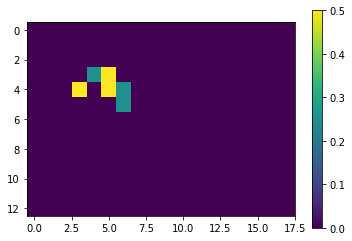

In [476]:
filt = reduce_array((percent_wrong>0.7), 2, np.mean)
plt.imshow(filt)
plt.colorbar()

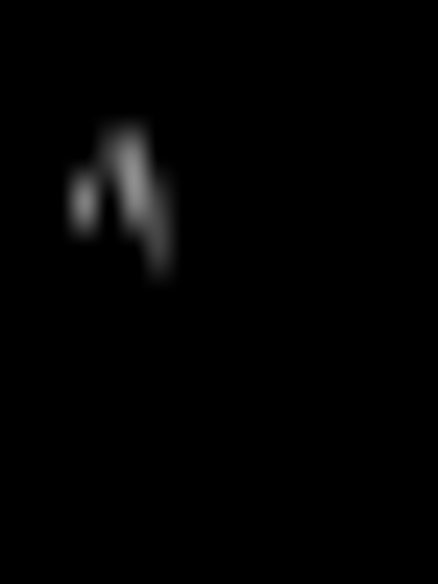

In [477]:
impil = Image.fromarray((255*filt).astype(np.uint8))
impil.resize(im.shape)

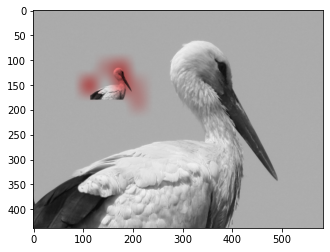

In [478]:
plt.imshow(show_heat_map(im,np.array(impil)/255.0))
plt.show()